## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
%matplotlib inline

## Analysis 1 - Basic Break Even Analysis

In [11]:
from whatif import Model
from whatif import get_sim_results_df

In [12]:
class SingleProductSPF(Model):
    """HW2 model"""
    def __init__(self, fixed_cost = 5000, var_cost = 100, selling_price = 115,
                 spf_constant = 4900, spf_linear = -35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def demand(self):
        return self.spf_quadratic * (self.selling_price ** 2) + self.spf_linear * self.selling_price + self.spf_constant

    def profit(self):
        return (self.selling_price * self.demand()) - (self.var_cost * self.demand()) - self.fixed_cost

In [13]:
hw2_model = SingleProductSPF()
print(f"Demand ≈ {hw2_model.demand()}")
print(f"Profit = ${hw2_model.profit()}")

Demand ≈ 1668.5
Profit = $20027.5


# 1b: 1-way Data Table

Define our prices, profits, demands

In [14]:
import matplotlib.pyplot as plt

prices = range(80, 141, 10)
profits = []
demands = []

Loop through each price

In [15]:
for price in prices:
    model = SingleProductSPF(selling_price=price)
    profits.append(model.profit())
    demands.append(model.demand())

Lets plot relationships

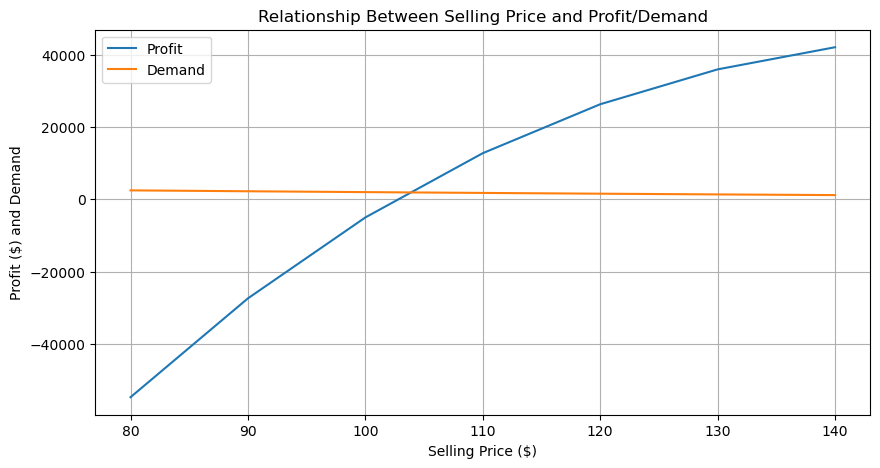

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(prices, profits, label='Profit')
plt.plot(prices, demands, label='Demand')
plt.xlabel("Selling Price ($)")
plt.ylabel("Profit ($) and Demand")
plt.title("Relationship Between Selling Price and Profit/Demand")
plt.legend()
plt.grid(True)
plt.show()


# 1c - Break Even:

In [17]:
def goal_seek(model, lower_bound, upper_bound):
    for price in range(lower_bound, upper_bound + 1):
        model.selling_price = price
        if model.profit() >= 0:
            return price
    return None

break_even_price = goal_seek(SingleProductSPF(), 80, 140)
print(f"Break Even Selling Price = ${break_even_price}")


Break Even Selling Price = $103


# 1d - 2-way Data Table:

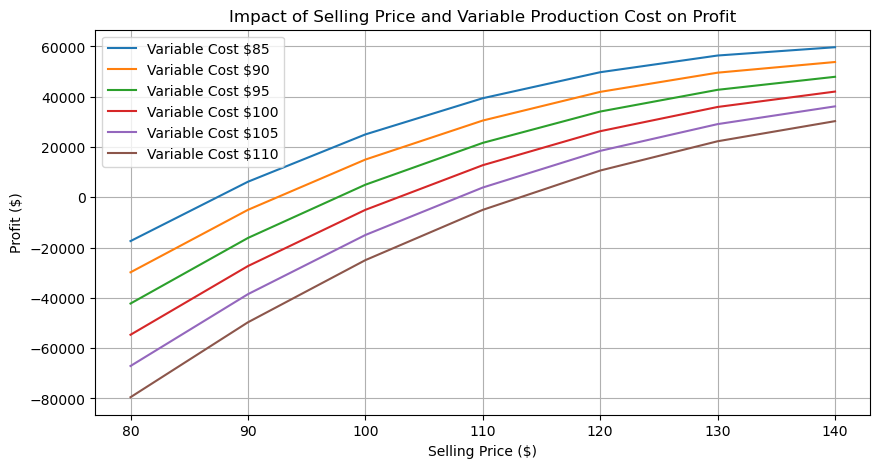

In [18]:
var_costs = range(85, 111, 5)

# Create 2D lists to store profits
profits_2d = [[SingleProductSPF(var_cost=vc, selling_price=sp).profit() for sp in prices] for vc in var_costs]

# Plot
plt.figure(figsize=(10, 5))
for i, var_cost in enumerate(var_costs):
    plt.plot(prices, profits_2d[i], label=f'Variable Cost ${var_cost}')
plt.xlabel("Selling Price ($)")
plt.ylabel("Profit ($)")
plt.title("Impact of Selling Price and Variable Production Cost on Profit")
plt.legend()
plt.grid(True)
plt.show()


# 1e - Digging Deeper:

Redo the Goal Seek with extended range

In [19]:
extended_break_even_price = goal_seek(SingleProductSPF(), 80, 250)
print(f"Break Even Selling Price with extended range = ${extended_break_even_price}")


Break Even Selling Price with extended range = $103


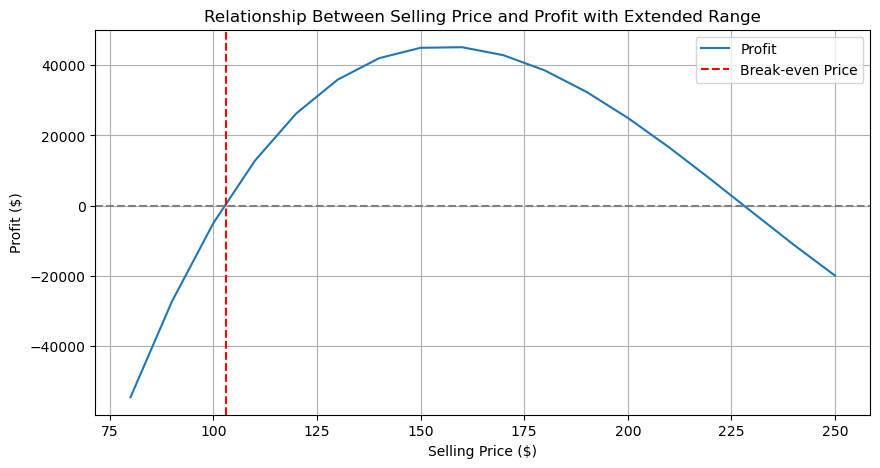

In [20]:
# Redo the 1-way data table with extended range
extended_prices = range(80, 251, 10)
extended_profits = []

for price in extended_prices:
    model = SingleProductSPF(selling_price=price)
    extended_profits.append(model.profit())

# Plot the extended range
plt.figure(figsize=(10, 5))
plt.plot(extended_prices, extended_profits, label='Profit')
plt.xlabel("Selling Price ($)")
plt.ylabel("Profit ($)")
plt.title("Relationship Between Selling Price and Profit with Extended Range")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(extended_break_even_price, color='red', linestyle='--', label='Break-even Price')
plt.legend()
plt.grid(True)
plt.show()


# 1f - Simulation:

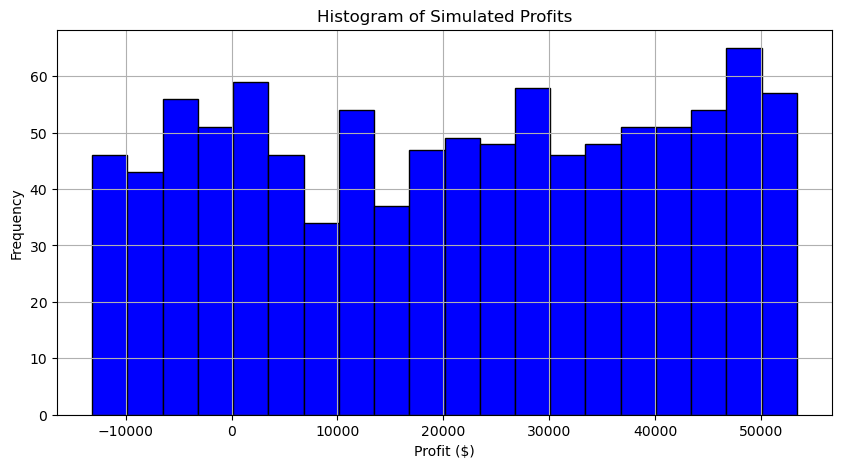

Probability of negative profit: 19.60%


In [21]:
import numpy as np
import matplotlib.pyplot as plt

class SingleProductSPF(Model):
    """HW2 model with simulation capability"""
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115,
                 spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic

    def demand(self):
        return self.spf_quadratic * self.selling_price ** 2 + self.spf_linear * self.selling_price + self.spf_constant

    def total_cost(self):
        return self.fixed_cost + self.var_cost * self.demand()

    def profit(self):
        return self.selling_price * self.demand() - self.total_cost()

    def simulate(self, n=1000):
        """Simulate profit over n runs with variable cost uniformly distributed between 80 and 120"""
        profits = []
        for _ in range(n):
            self.var_cost = np.random.uniform(80, 120)
            profits.append(self.profit())
        return profits


# Simulate profit over 1000 runs
model = SingleProductSPF()
simulated_profits = model.simulate(n=1000)

# Create a histogram of profit
plt.figure(figsize=(10, 5))
plt.hist(simulated_profits, bins=20, color='blue', edgecolor='black')
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Profits")
plt.grid(True)
plt.show()

# Calculate probability of negative profit
negative_profits = sum(1 for profit in simulated_profits if profit < 0)
probability_negative_profit = negative_profits / len(simulated_profits) * 100
print(f"Probability of negative profit: {probability_negative_profit:.2f}%")
